In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
#show plots in notebook
%matplotlib inline

# grab saved dataset
df = pd.read_pickle('dataset.pkl')
#show the first 5 rows
print(df.sample(n=5))

/Users/cohare/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):



python version 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version 0.19.2
numpy version 1.11.3
               username   password  username length  password length  \
823072        arpik1992     777235                9                6   
8700281  stephen.hurrle   7panther               14                8   
3617971        gogogo35     yesman                8                6   
9928981    zatus4149081   1232323q               12                8   
3592659     gloria_may2  danielle4               11                9   

        username pattern password pattern  
823072         aaaaa0000           000000  
8700281   aaaaaaa&aaaaaa         0aaaaaaa  
3617971         aaaaaa00           aaaaaa  
9928981     aaaaa0000000         0000000a  
3592659      aaaaaa&aaa0        aaaaaaaa0  


In [17]:
# Calculate frequency of each charcter of all passwords
charFreq = {'\0':0}
for num in range(0,127):
    charFreq[chr(num)] = 0
for password in df['password']:
    for c in str(password):
        charFreq[c] += 1
print(charFreq)

{'\x00': 0, '\x01': 0, '\x02': 2, '\x03': 31, '\x04': 0, '\x05': 0, '\x06': 0, '\x07': 1, '\x08': 0, '\t': 0, '\n': 0, '\x0b': 0, '\x0c': 0, '\r': 0, '\x0e': 0, '\x0f': 2, '\x10': 0, '\x11': 0, '\x12': 0, '\x13': 0, '\x14': 0, '\x15': 0, '\x16': 0, '\x17': 1, '\x18': 0, '\x19': 0, '\x1a': 0, '\x1b': 0, '\x1c': 0, '\x1d': 0, '\x1e': 0, '\x1f': 0, ' ': 61, '!': 10353, '"': 0, '#': 2781, '$': 3950, '%': 1042, '&': 1011, "'": 744, '(': 93, ')': 11, '*': 9939, '+': 260, ',': 0, '-': 20390, '.': 37959, '/': 67, '0': 3310600, '1': 4751194, '2': 3111198, '3': 2168753, '4': 1845612, '5': 1980405, '6': 1890046, '7': 1931517, '8': 2036414, '9': 2790000, ':': 9, ';': 625, '<': 2, '=': 810, '>': 3, '?': 4527, '@': 7719, 'A': 223322, 'B': 134408, 'C': 133753, 'D': 133401, 'E': 174236, 'F': 109205, 'G': 113027, 'H': 110162, 'I': 115795, 'J': 93063, 'K': 107284, 'L': 135003, 'M': 142667, 'N': 134861, 'O': 113121, 'P': 120632, 'Q': 66359, 'R': 151967, 'S': 168694, 'T': 137600, 'U': 102116, 'V': 87765, 

In [21]:
# Sorted tuples of characters and their frequency
import operator
sorted_freqs = sorted(charFreq.items(), key=operator.itemgetter(1))
print(sorted_freqs)

[('\x00', 0), ('\x01', 0), ('\x04', 0), ('\x05', 0), ('\x06', 0), ('\x08', 0), ('\t', 0), ('\n', 0), ('\x0b', 0), ('\x0c', 0), ('\r', 0), ('\x0e', 0), ('\x10', 0), ('\x11', 0), ('\x12', 0), ('\x13', 0), ('\x14', 0), ('\x15', 0), ('\x16', 0), ('\x18', 0), ('\x19', 0), ('\x1a', 0), ('\x1b', 0), ('\x1c', 0), ('\x1d', 0), ('\x1e', 0), ('\x1f', 0), ('"', 0), (',', 0), ('\x07', 1), ('\x17', 1), ('\x02', 2), ('\x0f', 2), ('<', 2), ('>', 3), (':', 9), (')', 11), ('{', 14), ('}', 20), ('\x03', 31), (' ', 61), ('`', 65), ('/', 67), ('|', 75), ('(', 93), (']', 133), ('[', 167), ('~', 228), ('+', 260), ('^', 379), ('\\', 382), (';', 625), ("'", 744), ('=', 810), ('&', 1011), ('%', 1042), ('#', 2781), ('$', 3950), ('?', 4527), ('@', 7719), ('*', 9939), ('!', 10353), ('-', 20390), ('.', 37959), ('_', 38379), ('Q', 66359), ('X', 74301), ('Z', 77862), ('W', 86311), ('V', 87765), ('J', 93063), ('Y', 97692), ('U', 102116), ('K', 107284), ('F', 109205), ('H', 110162), ('G', 113027), ('O', 113121), ('I', 

In [24]:
# Total number of characters
count = 0
for freq in charFreq:
    count += charFreq[freq]
print(count)

75922531


    character  frequency
81          Q    66359.0
114         r  3093740.0
103         g  1246216.0
26                  0.0
4                   0.0


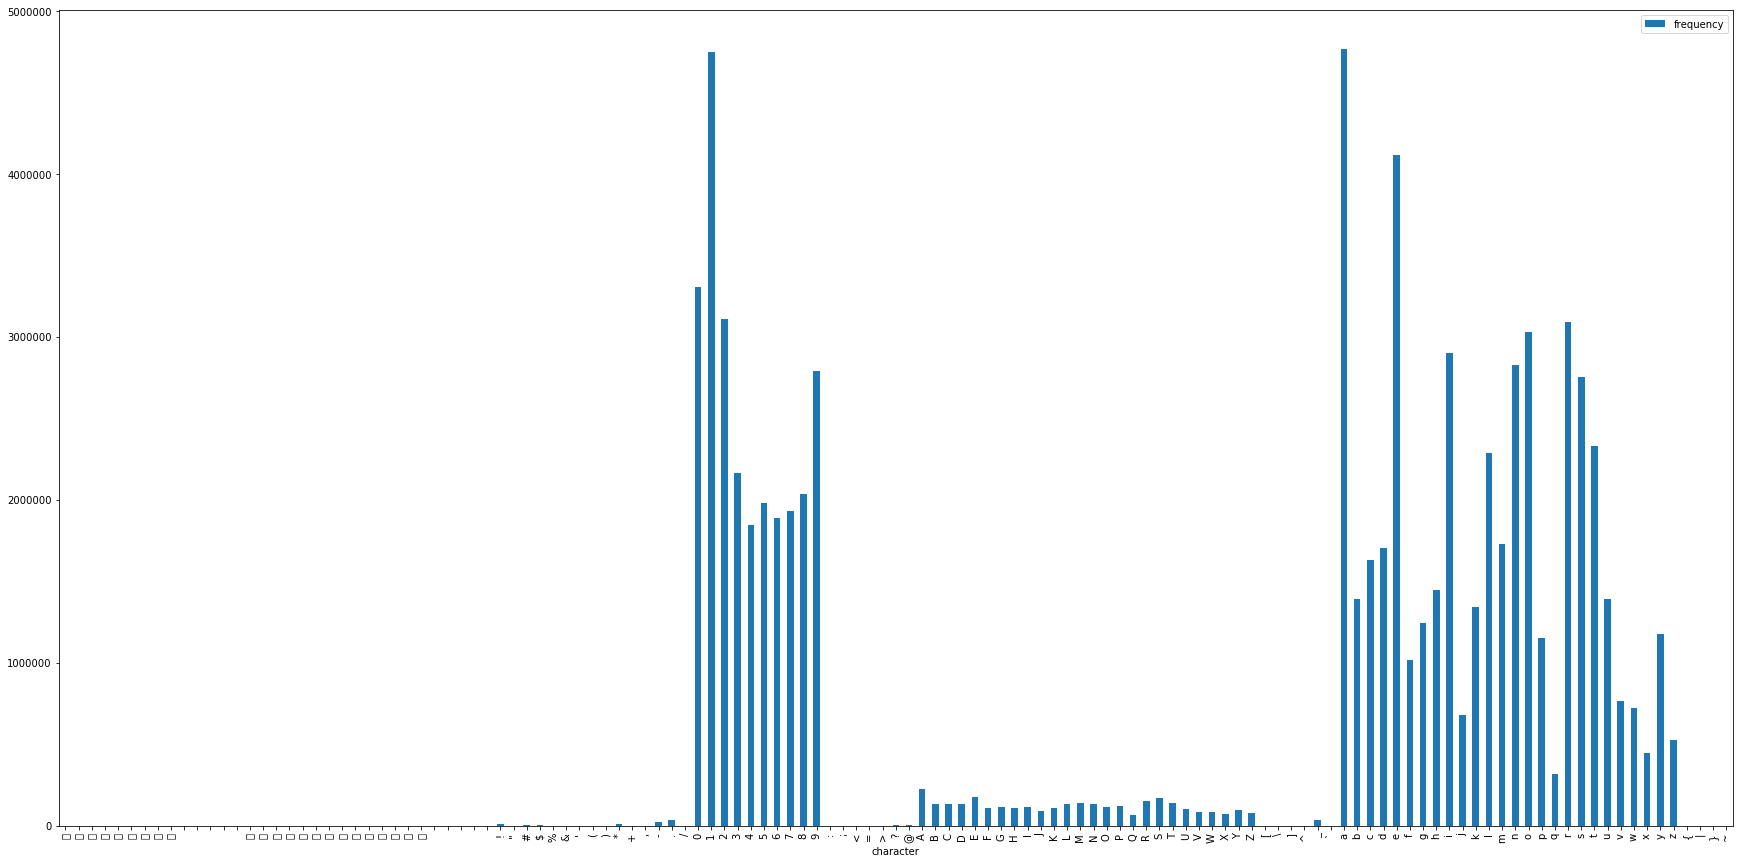

In [42]:
# Put in dataframe to later plot
dfFreqs = pd.DataFrame(columns=['character', 'frequency'])
i = 0
for freq in charFreq:
    dfFreqs.loc[i] = [freq, int(charFreq[freq])]
    i += 1
print(dfFreqs.sample(n=5))
dfFreqs.plot(x='character',y='frequency', kind='bar', figsize=(30,15))